In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = "Final Merge 7_15_20.csv"
file_df = pd.read_csv(file, encoding="ISO-8859-1")
first_file = file_df.drop(['Unnamed: 0'], axis=1)
first_file.head()

#convert washington population into a dataframe
file1 = "Washington_pop_data.csv"
population_df = pd.read_csv(file1, encoding="ISO-8859-1")
population_df.head()

clean_file = pd.merge(first_file, population_df, on="County", how="outer", indicator = "exists")
clean_file.head()

,County,Month,NewPos_All,Age 0-19_cases,Age 20-39_cases,Age 40-59_cases,Age 60-79_cases,Age 80+_cases,Positive UnkAge_cases,Deaths,...,Age 40-59_hospitalization,Age 60-79_hospitalization,Age 80+_hospitalization,Positive UnkAge_hospitalization,Political_Party,Percent Below Poverty Level,Household Income Median,Household Income Mean,Population,exists
0,Adams County,3.0,33.0,2.0,10.0,12.0,9.0,0.0,0.0,0.0,...,2.0,3.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
1,Adams County,4.0,16.0,1.0,8.0,6.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
2,Adams County,5.0,40.0,9.0,17.0,12.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
3,Adams County,6.0,77.0,5.0,28.0,29.0,13.0,0.0,2.0,0.0,...,2.0,1.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
4,Asotin County,3.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,Republican,13.0,50423.0,65079.0,22582.0,both


In [2]:
clean_file.columns

Index(['County', 'Month', 'NewPos_All', 'Age 0-19_cases', 'Age 20-39_cases',
       'Age 40-59_cases', 'Age 60-79_cases', 'Age 80+_cases',
       'Positive UnkAge_cases', 'Deaths', 'Age 0-19_death', 'Age 20-39_death',
       'Age 40-59_death', 'Age 60-79_death', 'Age 80+_death',
       'Positive UnkAge_death', 'Hospitalizations_hospitalization',
       'Age 0-19_hospitalization', 'Age 20-39_hospitalization',
       'Age 40-59_hospitalization', 'Age 60-79_hospitalization',
       'Age 80+_hospitalization', 'Positive UnkAge_hospitalization',
       'Political_Party', 'Percent Below Poverty Level',
       'Household Income Median', 'Household Income Mean', 'Population',
       'exists'],
      dtype='object')

In [4]:
clean_file.dtypes

County                                object
Month                                float64
NewPos_All                           float64
Age 0-19_cases                       float64
Age 20-39_cases                      float64
Age 40-59_cases                      float64
Age 60-79_cases                      float64
Age 80+_cases                        float64
Positive UnkAge_cases                float64
Deaths                               float64
Age 0-19_death                       float64
Age 20-39_death                      float64
Age 40-59_death                      float64
Age 60-79_death                      float64
Age 80+_death                        float64
Positive UnkAge_death                float64
Hospitalizations_hospitalization     float64
Age 0-19_hospitalization             float64
Age 20-39_hospitalization            float64
Age 40-59_hospitalization            float64
Age 60-79_hospitalization            float64
Age 80+_hospitalization              float64
Positive U

In [5]:
print(clean_file['County'].value_counts())

Kittitas County        6
Snohomish County       6
Yakima County          6
Thurston County        5
Grant County           5
Grays Harbor County    5
Cowlitz County         5
Skagit County          5
King County            5
Clark County           5
Island County          5
Whatcom County         5
Kitsap County          5
Benton County          5
Franklin County        5
Chelan County          5
Pierce County          5
Spokane County         5
Asotin County          4
Douglas County         4
Whitman County         4
Pend Oreille County    4
Walla Walla County     4
Adams County           4
Clallam County         4
Stevens County         4
Lewis County           4
Klickitat County       4
Okanogan County        4
Jefferson County       4
Pacific County         4
Mason County           4
Wahkiakum County       3
Unassigned             3
Skamania County        3
San Juan County        3
Columbia County        2
Lincon County          1
Ferry County           1
Garfield County        1


In [6]:
clean_file.head()

rename_file = clean_file.rename(columns={"NewPos_All": "Total Positive Cases", 
                           "Age 0-19_cases": "Age 0-19 Cases",
                           "Age 20-39_cases": "Age 20-39 Cases",
                           "Age 40-59_cases": "Age 40-59 Cases",
                           "Age 60-79_cases": "Age 60-79 Cases",
                           "Age 80+_cases": "Age 80+ Cases",
                           "Positive UnkAge_cases": "Age Unknown Cases",
                           "Deaths": "Total Deaths",
                           "Age 0-19_death": "Age 0-19 Deaths",
                           "Age 20-39_death": "Age 20-39 Deaths",
                           "Age 40-59_death": "Age 40-59 Deaths",
                           "Age 60-79_death": "Age 60-79 Deaths",
                           "Age 80+_death": "Age 80+ Deaths",
                           "Positive UnkAge_death": "Age Unknown Deaths",
                           "Hospitalizations_hospitalization": "Total Hospitalizations",
                           "Age 0-19_hospitalization": "Age 0-19 Hospitalizations",
                           "Age 20-39_hospitalization": "Age 20-39 Hospitalizations",
                           "Age 40-59_hospitalization": "Age 40-59 Hospitalizations",
                           "Age 60-79_hospitalization": "Age 60-79 Hospitalizations",
                           "Age 80+_hospitalization": "Age 80+ Hospitalizations",
                           "Positive UnkAge_hospitalization": "Age Unknown Hospitalizations",
                           "Political_Party": "Political Party",
                           })

rename_file.head()

,County,Month,Total Positive Cases,Age 0-19 Cases,Age 20-39 Cases,Age 40-59 Cases,Age 60-79 Cases,Age 80+ Cases,Age Unknown Cases,Total Deaths,...,Age 40-59 Hospitalizations,Age 60-79 Hospitalizations,Age 80+ Hospitalizations,Age Unknown Hospitalizations,Political Party,Percent Below Poverty Level,Household Income Median,Household Income Mean,Population,exists
0,Adams County,3.0,33.0,2.0,10.0,12.0,9.0,0.0,0.0,0.0,...,2.0,3.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
1,Adams County,4.0,16.0,1.0,8.0,6.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
2,Adams County,5.0,40.0,9.0,17.0,12.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
3,Adams County,6.0,77.0,5.0,28.0,29.0,13.0,0.0,2.0,0.0,...,2.0,1.0,0.0,0.0,Republican,25.2,49142.0,61370.0,19983.0,both
4,Asotin County,3.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,Republican,13.0,50423.0,65079.0,22582.0,both


In [7]:
political_groups = rename_file.groupby(["Political Party", "County", "Month"])
political_groups.sum()

Total Positive Cases  Age 0-19 Cases  \
Political Party County         Month                                         
Democratic      Clallam County 3.0                    13.0             0.0   
                               4.0                     6.0             0.0   
                               5.0                     9.0             4.0   
                               6.0                    15.0             2.0   
                Clark County   2.0                     3.0             0.0   
...                                                    ...             ...   
Republican      Yakima County  2.0                     5.0             0.0   
                               3.0                   501.0            22.0   
                               4.0                  1175.0           103.0   
                               5.0                  3528.0           441.0   
                               6.0                  2279.0           362.0   

                                      Age 20-39 Cases  Age 40-59 Cases  \
Political Party County         Month                                     
Democratic      Clallam County 3.0                4.0              2.0   
                               4.0                4.0              1.0   
                               5.0                1.0              3.0   
                               6.0                6.0              4.0   
                Clark County   2.0                0.0              1.0   
...                                               ...              ...   
Republican      Yakima County  2.0                1.0              3.0   
                               3.0              144.0            163.0   
                               4.0              412.0            392.0   
                               5.0             1515.0           1085.0   
                               6.0              952.0            593.0   

                                      Age 60-79 Cases  Age 80+ Cases  \
Political Party County         Month                                   
Democratic      Clallam County 3.0                7.0            0.0   
                               4.0                0.0            1.0   
                               5.0                0.0            1.0   
                               6.0                3.0            0.0   
                Clark County   2.0                1.0            1.0   
...                                               ...            ...   
Republican      Yakima County  2.0                1.0            0.0   
                               3.0              125.0           46.0   
                               4.0              190.0           77.0   
                               5.0              407.0           80.0   
                               6.0              248.0          124.0   

                                      Age Unknown Cases  Total Deaths  \
Political Party County         Month                                    
Democratic      Clallam County 3.0                  0.0           0.0   
                               4.0                  0.0           0.0   
                               5.0                  0.0           0.0   
                               6.0                  0.0           0.0   
                Clark County   2.0                  0.0           2.0   
...                                                 ...           ...   
Republican      Yakima County  2.0                  0.0           0.0   
                               3.0                  1.0          35.0   
                               4.0                  1.0          52.0   
                               5.0                  0.0          46.0   
                               6.0                  0.0          27.0   

                                      Age 0-19 Deaths  Age 20-39 Deaths  ...  \
Political Party County         Month                                     ...   
Democratic   

In [8]:
# Democratic party

democrats_df = rename_file.loc[rename_file["Political Party"] == "Democratic",:]
print(democrats_df["County"].unique())
print('---------------------------')
print(f'The total number of democratic counties: {len(democrats_df["County"].unique())}')

['Clallam County' 'Clark County' 'Island County' 'Jefferson County'
 'King County' 'Kitsap County' 'Pacific County' 'Pierce County'
 'San Juan County' 'Skagit County' 'Snohomish County' 'Thurston County'
 'Whatcom County' 'Whitman County']
---------------------------
The total number of democratic counties: 14


In [9]:
# Republican party

republican_df = rename_file.loc[rename_file["Political Party"] == "Republican",:]
print(republican_df["County"].unique())
print('---------------------------')
print(f'The total number of republican counties: {len(republican_df["County"].unique())}')

['Adams County' 'Asotin County' 'Benton County' 'Chelan County'
 'Columbia County' 'Cowlitz County' 'Douglas County' 'Franklin County'
 'Grant County' 'Grays Harbor County' 'Kittitas County' 'Klickitat County'
 'Lewis County' 'Mason County' 'Okanogan County' 'Pend Oreille County'
 'Skamania County' 'Spokane County' 'Stevens County' 'Wahkiakum County'
 'Walla Walla County' 'Yakima County' 'Ferry County' 'Garfield County'
 'Lincoln County']
---------------------------
The total number of republican counties: 25


Text(0.5, 1.0, 'Counties by Political Affiliation')

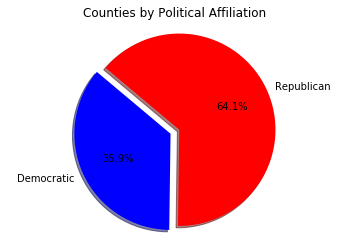

In [12]:
# Pie Chart
political_names = ["Democratic", "Republican"]
political_breakdown = [14, 25]
colors = ["blue", "red"]
explode = (0.1, 0)

plt.pie(political_breakdown, explode=explode, labels=political_names, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Counties by Political Affiliation")

### Democratic Counties

In [14]:
#Democratic counties and income

#Income by counties and political leaning
democrat_county = democrats_df.loc[:,["County", "Household Income Median", "Percent Below Poverty Level"]]
democrat_county

#grab unique county names
dem_county_names = democrat_county["County"].unique()
dem_county_name_list = dem_county_names.tolist()
#convert county array into a list
dem_county_name_list
    
#grab unique median income
dem_median_income = democrat_county["Household Income Median"].unique()
dem_median_income_list = dem_median_income.tolist()
#convert median income array into a list
dem_median_income_list

#grab unique poverty level
dem_percent_poverty = democrat_county["Percent Below Poverty Level"].unique()
dem_percent_poverty_list = dem_percent_poverty.tolist()
#convert poverty level array into a list
dem_percent_poverty_list

#zip the two lists together
dem_county_income_poverty = zip(dem_county_name_list, dem_median_income_list)
dem_county_income_poverty

#create a dataframe
dem_county_income_poverty = pd.DataFrame(
    {"County Name": dem_county_name_list,
     "Household Median Income": dem_median_income_list,
     "Percent Below Poverty Level": dem_percent_poverty_list
    }
)
dem_county_income_poverty

,County Name,Household Median Income,Percent Below Poverty Level
0,Clallam County,49913.0,15.9
1,Clark County,71636.0,9.3
2,Island County,64809.0,8.6
3,Jefferson County,54471.0,13.3
4,King County,89418.0,9.5
5,Kitsap County,71610.0,9.7
6,Pacific County,44846.0,17.4
7,Pierce County,67868.0,11.2
8,San Juan County,60711.0,11.4
9,Skagit County,62865.0,12.8


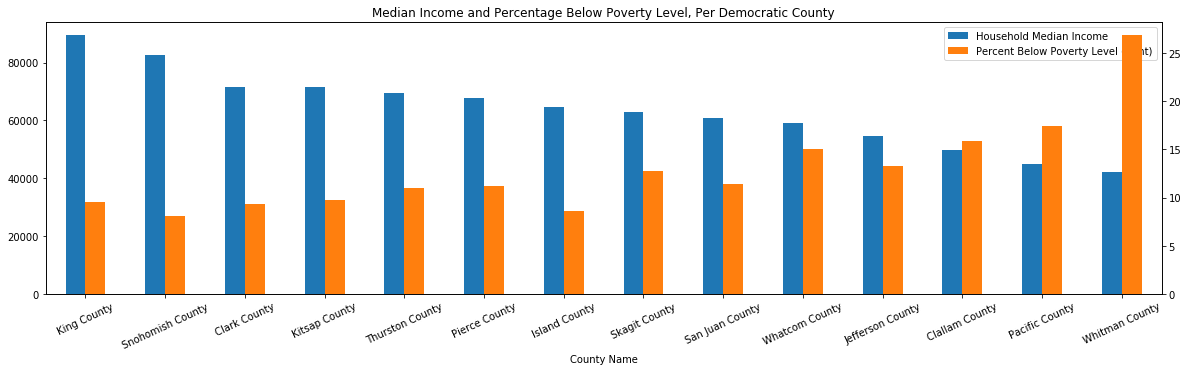

<Figure size 432x288 with 0 Axes>

In [15]:
#plot bar graph 
# Set the index to be "County" so they will be used as labels
dem_index = dem_county_income_poverty.set_index("County Name")

dem_sort = dem_index.sort_values('Household Median Income', ascending=False)

dem_sort.plot(kind="bar", secondary_y='Percent Below Poverty Level', figsize=(20,5), rot=25)

# Set a title for the chart
plt.title("Median Income and Percentage Below Poverty Level, Per Democratic County")

plt.show()
plt.tight_layout()


### Republican Counties

In [16]:
#Republican counties and income

#Income by counties and political leaning
republican_income_county = republican_df.loc[:,["County", "Household Income Median","Percent Below Poverty Level"]]
republican_income_county

#grab unique county names
rep_county_names = republican_income_county["County"].unique()
rep_county_name_list = rep_county_names.tolist()
#convert county array into a list
rep_county_name_list
    
#grab unique median income
rep_median_income = republican_income_county["Household Income Median"].unique()
rep_median_income_list = rep_median_income.tolist()
#convert median income array into a list
rep_median_income_list

#grab poverty data
rep_county_poverty = republican_income_county.groupby("County")["Percent Below Poverty Level"].max()
rep_county_poverty
#rep_county_poverty.reset_index()

#zip the two lists together
#rep_county_income = zip(rep_county_name_list, rep_county_poverty)

#create a dataframe
rep_county_income_df = pd.DataFrame(
    {"Household Median Income": rep_median_income_list,
     "Percent Below Poverty Level": rep_county_poverty
    }
)
rep_county_income_df

,Household Median Income,Percent Below Poverty Level
County,,
Adams County,49142.0,25.2
Asotin County,50423.0,13.0
Benton County,65650.0,12.8
Chelan County,56135.0,11.6
Columbia County,51111.0,11.6
Cowlitz County,51752.0,16.0
Douglas County,60452.0,13.3
Ferry County,62002.0,18.8
Franklin County,54982.0,15.7


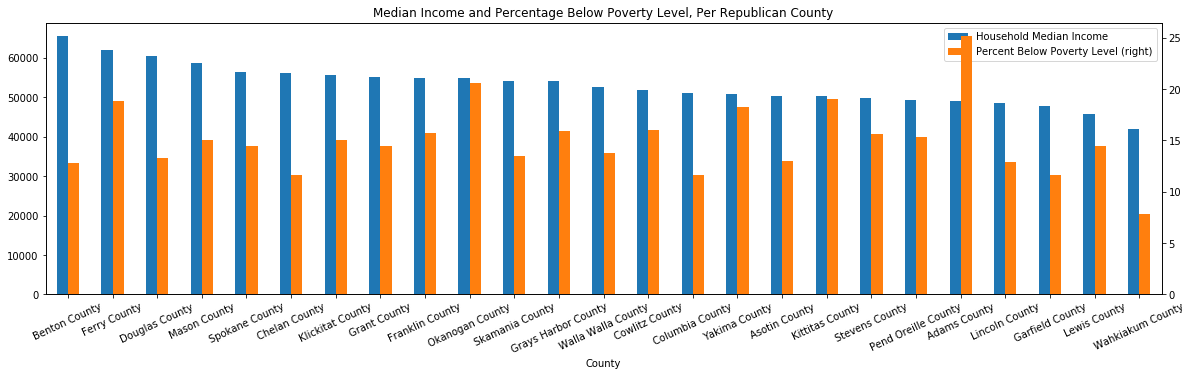

<Figure size 432x288 with 0 Axes>

In [26]:
# plot bar graph 
# Set the index to be "County" so they will be used as labels
#rep_index = rep_county_poverty.set_index("County Name")

rep_sort = rep_county_income_df.sort_values('Household Median Income', ascending=False)

rep_sort.plot(kind="bar", secondary_y='Percent Below Poverty Level', figsize=(20,5), rot=25)

# Set a title for the chart
plt.title("Median Income and Percentage Below Poverty Level, Per Republican County")

plt.show()
plt.tight_layout()

In [ ]:
# Line graph
#fig, ax = plt.subplots(figsize=(10,4))
# use unstack()
#democrats_df.groupby(['County','Month']).count()['Total Positive Cases'].unstack().plot(ax=ax)


#data.groupby(['date','type']).count()['amount'].plot(ax=ax)
#plt.plot(x_axis, sin, linewidth=0, marker="o", color="blue")